
# sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

```python 
sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```


In [61]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [28]:
# labels=["ant", "bird", "cat"]
# labels=[  0  ,   1   ,   2  ]

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

# Only in the binary case, we can use "ravel()"

In [29]:
# tp=(true positive)
# fp=(false positive)
# tn=(true negative)
# fn=(false negative) 

y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print((tn, fp, fn, tp))

(0, 2, 1, 1)


In [33]:
# This is not correct 
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion = confusion_matrix(y_true, y_pred).ravel()
print(confusion)

[2 0 0 0 0 1 1 0 2]


In [39]:
def binary_perf_measure(y_true, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        if y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
        if y_true[i] == 0 and y_pred[i] == 0:
            TN += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            FN += 1

    return TN, FP, FN, TP

y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]

TN, FP, FN, TP = binary_perf_measure(y_true, y_pred)
print((TN, FP, FN, TP))

(0, 2, 1, 1)


# Self-Definition Plot

In [112]:
def plot_confusion_matrix(cm, classes, savename, figsize=(12, 8), fontsize=15, normalized=False):
    
    if normalized:
        title='Normalized Confusion Matrix'
        # Normalize by row
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        title='Confusion Matrix'

    plt.figure(figsize=figsize, dpi=100)
    np.set_printoptions(precision=2)

    # each cell probability in confusion matrix
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=fontsize, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()

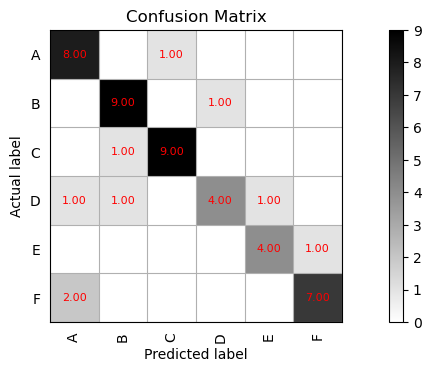

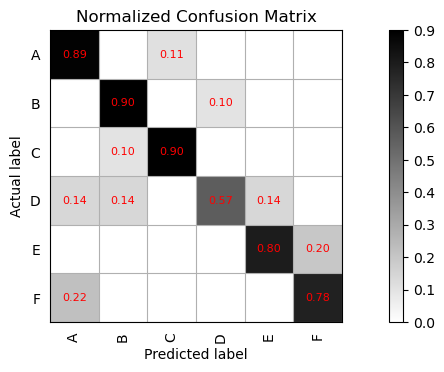

In [116]:
# Demo 1
classes = ['A', 'B', 'C', 'D', 'E', 'F']

# 6 class with 50 random sample
random_numbers = np.random.randint(6, size=50)  

# sample real label
y_true = random_numbers.copy() 

# generate fake error sample
random_numbers[:10] = np.random.randint(6, size=10)  
# fake predicted label
y_pred = random_numbers  

# Generate confusion matrix and Plot the chart
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes, 'confusion_matrix.png', figsize=(12, 4), fontsize=8, normalized=False)
plot_confusion_matrix(cm, classes, 'confusion_matrix.png', figsize=(12, 4), fontsize=8, normalized=True)

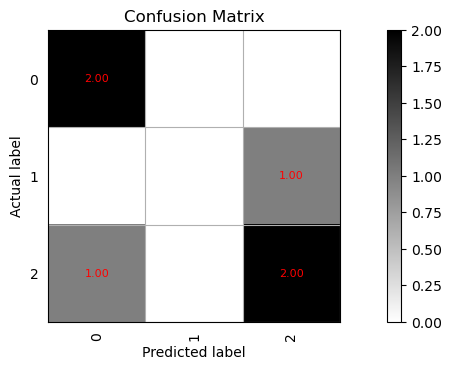

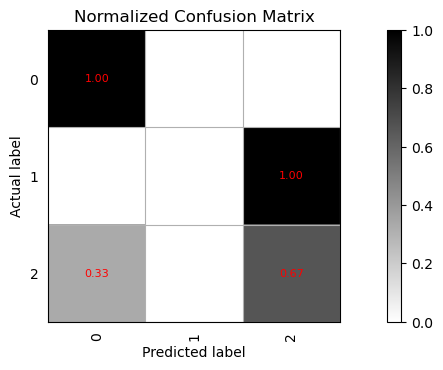

In [109]:
# Demo 2 
classes = [0, 1, 2]

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

# Generate confusion matrix and Plot the chart
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes, 'confusion_matrix.png', figsize=(12, 4), fontsize=8, normalized=False)
plot_confusion_matrix(cm, classes, 'confusion_matrix.png', figsize=(12, 4), fontsize=8, normalized=True)

# Reference

https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

https://link.zhihu.com/?target=https%3A//blog.csdn.net/qq_36982160/article/details/80038380

https://zhuanlan.zhihu.com/p/73558315